<a href="https://colab.research.google.com/github/pratiktamgadge/Cognifyz-Technologies-Internship-Restaurant-Data-Analysis/blob/main/Restaurant_data_Analysis_Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Restaurant_Data_Analysis

##### **Project Type** - EDA
##### **Industry** - Cognifyz Technologies
##### **Contribution** - Individual
##### **Member Name** - Pratik Tamgadge
##### **Level** - 3

# **Project Summary -**

**Key Tasks in Level 3:**

**Task-1: Restaurant Reviews**

1) Analyze the text reviews to identify the most
common positive and negative keywords.

2) Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.


**Task-2: Votes Analysis**

1) Identify the restaurants with the highest and
lowest number of votes.


2) Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

**Task-3: Price Range vs. Online Delivery and
Table Booking**

1) Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.


2) Determine if higher-priced restaurants are
more likely to offer these services.



# ***Let's Begin***

## ***Task 1: Restaurant Reviews***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/Dataset .csv")

In [ ]:
# Dataset Rows & Columns count
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
print(df['Rating text'])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


### 1) Analyze the text reviews to identify the most common positive and negative keywords.

In [ ]:
# Select rows from the DataFrame 'df' where the 'Aggregate rating' column has values greater than or equal to 2.5
positive_data = df.loc[df['Aggregate rating'] >= 2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [ ]:
# Get the unique values from the 'Rating text' column in the 'positive_data' DataFrame.
# This will return only the distinct rating descriptions for positive ratings (>= 2.5).
positive_keywords = positive_data['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


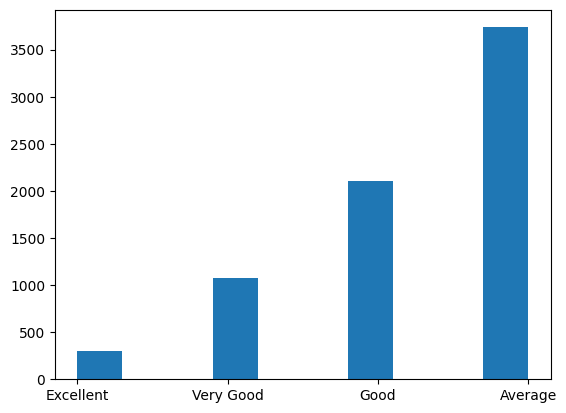

In [ ]:
# Create a histogram to show the frequency of each unique rating text in the 'positive_data' DataFrame.
# 'positive_data['Rating text']' is used as the data to plot, and 'label=positive_keywords' adds a legend label.
plt.hist(positive_data['Rating text'], label=positive_keywords)
plt.show()

In [ ]:
# Select rows from the DataFrame 'df' where the 'Aggregate rating' is less than 2.5 and greater than 0.
# This filters out rows with low ratings but excludes rows where the rating is zero (assuming zero means no rating).
negative_data = df.loc[(df['Aggregate rating'] < 2.5) & (df['Aggregate rating'] > 0)]
# print(negative_data)
negative_keywords = negative_data['Rating text'].unique()
print(negative_keywords)

['Poor']


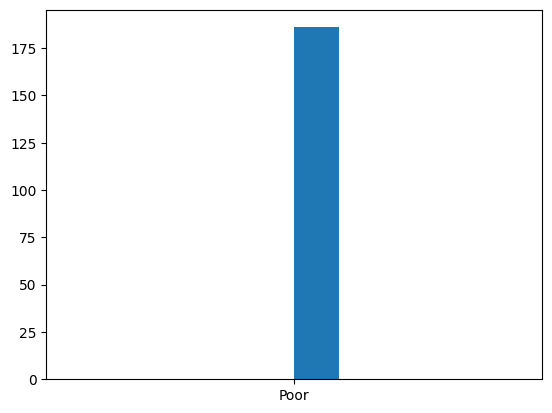

In [ ]:
# Create a histogram to show the frequency of each unique rating text in the 'negative_data' DataFrame.
# This histogram visualizes how often each negative rating description appears.
plt.hist(negative_data['Rating text'], label=negative_keywords)
plt.show()

## ***Task 2: Votes Analysis***

### 1) Identify the restaurants with the highest and lowest number of votes.

In [ ]:
#Group the DataFrame 'df' by 'Restaurant Name' and sum the 'Votes' for each restaurant.
# Then, sort the results in descending order to identify the restaurant with the highest total votes.
Highest_voted_resturant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
Highest_voted_resturant= Highest_voted_resturant.idxmax()
print("The Highest Voted Resturent is : ",Highest_voted_resturant)

The Highest Voted Resturent is :  Barbeque Nation


In [ ]:
# Then, sort the results in ascending order to identify the restaurant with the lowest total votes.
lowest_rated_resturant= df.groupby('Restaurant Name')['Votes'].sum().sort_values()
lowest_rated_resturant=lowest_rated_resturant.idxmin()
print("The Lowest Voted Resturent is : ",lowest_rated_resturant)

The Lowest Voted Resturent is :  Laxmi Food Corner


### 2) Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [ ]:
# Calculate the correlation coefficient between the 'Votes' and 'Aggregate rating' columns in the DataFrame 'df'.
# 'np.corrcoef' returns a matrix of correlation values between the two columns.
corelation=np.corrcoef(df['Votes'],df['Aggregate rating'])
corelation=np.round(corelation,2)
print(corelation)

[[1.   0.31]
 [0.31 1.  ]]


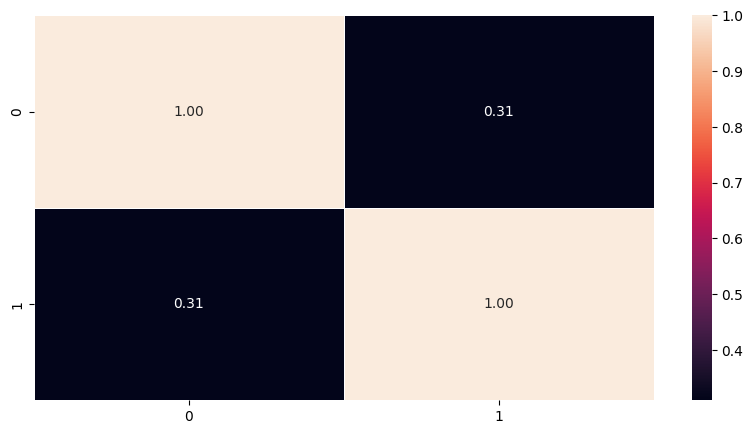

In [ ]:
# I have plot a heat map to showcase the value.
# And Set up the figure size and resolution for the plot.
plt.figure(figsize=(10,5), dpi =100)
sns.heatmap(corelation,annot=True,fmt=".2f", linewidth=.4)
plt.show()

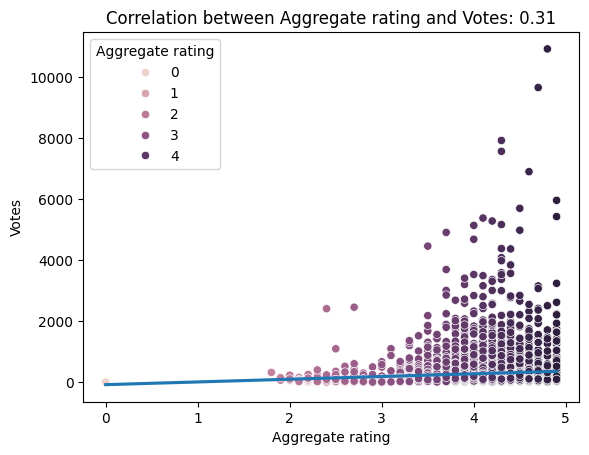

As per result corelation value = 0.31 , which indicates there is a moderate positive corelation between these two variables.


In [ ]:
# Heatmap is not that much appropriate to showcase more than 2 values So I.
# Create a scatter plot using Seaborn to visualize the relationship between 'Aggregate rating' and 'Votes'.
sns.scatterplot(data=df , y = 'Votes' , hue = 'Aggregate rating' , x = 'Aggregate rating' )
sns.regplot(data=df, x='Aggregate rating', y='Votes', scatter=False)
plt.title(f"Correlation between Aggregate rating and Votes: 0.31")
plt.show()
print("As per result corelation value = 0.31 , which indicates there is a moderate positive corelation between these two variables.")

## ***Task 3: Price Range vs. Online Delivery and Table Booking***

1) Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [ ]:
# To analyzed this we need to plot 2 charts together

In [ ]:
x1 = df['Has Online delivery']
y = df['Average Cost for two']
x2 = df['Has Table booking']

In [ ]:
# Plot 1 for Online Delivery with the avg cost
# Plot 2 for Table Booking with the avg cost

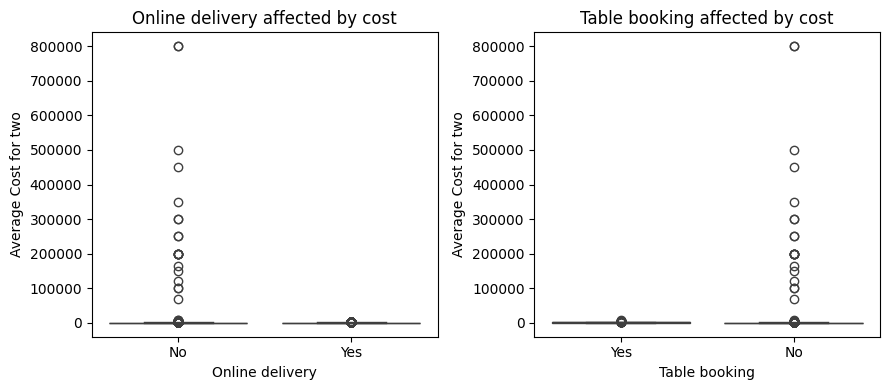

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Online delivery affected by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2,y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking affected by cost')
plt.tight_layout()
plt.show()

In [ ]:
print(" Both the Online delivery and Table booking are negetively impacted by the cost")

 Both the Online delivery and Table booking are negetively impacted by the cost


### 2) Determine if higher-priced restaurants are more likely to offer these services.

In [ ]:
print("High priced Restaurants which have average cost more than 10,000 did not provide Online delivery as well as Table Booking facilities.")

High priced Restaurants which have average cost more than 10,000 did not provide Online delivery as well as Table Booking facilities.


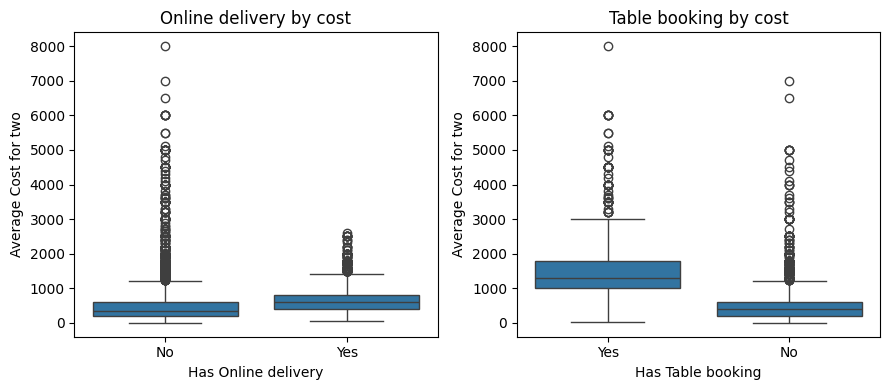

In [ ]:
# Matplotlib(plt): This library is used here for creating static, interactive, and animated plots in Python.
# Seaborn (sns): This library is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
# Filtering data to include only rows where 'Average Cost for two' is less than 10,000
sns.boxplot(x=x1, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000 ] )
plt.title('Online delivery by cost')
plt.subplot(1,2,2)
# Again, filtering data to include only rows where 'Average Cost for two' is less than 10,000
sns.boxplot(x=x2, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000 ] )
plt.title('Table booking by cost')
plt.tight_layout()
plt.show()

In [ ]:
print(" The Online delivery facility is present for only those resturent , where the avg cost is less than 1000. ")
print(" The Table booking facility is available in restaurants with an average cost ranging from 1000 to 2000. ")

 The Online delivery facility is present for only those resturent , where the avg cost is less than 1000. 
 The Table booking facility is available in restaurants with an average cost ranging from 1000 to 2000. 
